In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
da=pd.read_csv(r"C:\Users\sanks\OneDrive\Documents\StudentPerformanceFactors.csv")
d=da.copy(deep=True)
d.head(9)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69


In [3]:
d.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
d.shape

(6607, 20)

In [5]:
d.dropna(inplace=True)

In [6]:
d.describe(include=['int','float'])

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [7]:
d.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3251,3204,3807,3237,5893,2582,3826,4434,2553,5710,3159,3801,3688


In [8]:
print(d['Exam_Score'].mean())
print(d['Exam_Score'].std())

67.25211665098777
3.914216506751209


C:\Users\sanks\AppData\Local\Temp\ipykernel_6388\3626145760.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Hours_Studied'],bins=10)


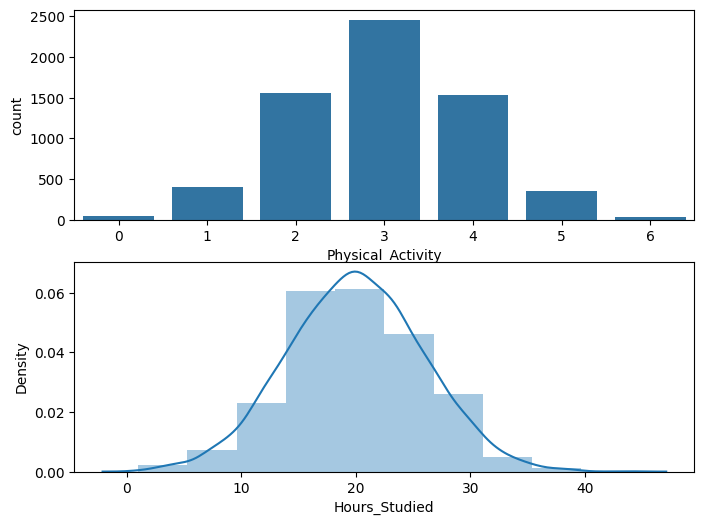

In [9]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
sns.countplot(x='Physical_Activity',data=d)
plt.subplot(2,1,2)
sns.distplot(d['Hours_Studied'],bins=10)
plt.show()

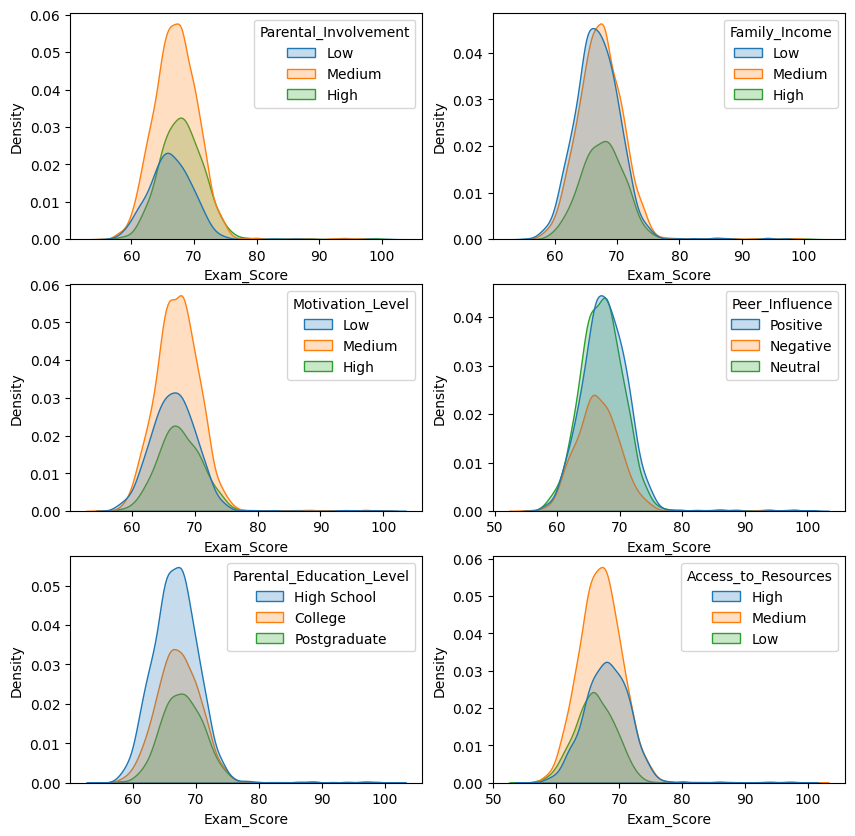

In [10]:
plt.figure(num=1,figsize=(10,10))
plt.subplot(3,2,1)
sns.kdeplot(data=d, x='Exam_Score', hue='Parental_Involvement', fill=True)
plt.subplot(3,2,2)
sns.kdeplot(data=d, x='Exam_Score', hue='Family_Income', fill=True)
plt.subplot(3,2,3)
sns.kdeplot(data=d, x='Exam_Score', hue='Motivation_Level', fill=True)
plt.subplot(3,2,4)
sns.kdeplot(data=d, x='Exam_Score', hue='Peer_Influence', fill=True)
plt.subplot(3,2,5)
sns.kdeplot(data=d, x='Exam_Score', hue='Parental_Education_Level', fill=True)
plt.subplot(3,2,6)
sns.kdeplot(data=d, x='Exam_Score', hue='Access_to_Resources', fill=True)
plt.show()

In [11]:
print(d.groupby('Parental_Involvement')['Exam_Score'].mean())
print(d.groupby('Family_Income')['Exam_Score'].mean())
print(d.groupby('Motivation_Level')['Exam_Score'].mean())
print(d.groupby('Access_to_Resources')['Exam_Score'].mean())
print(d.groupby('Parental_Education_Level')['Exam_Score'].mean())

Parental_Involvement
High      68.112200
Low       66.378776
Medium    67.113196
Name: Exam_Score, dtype: float64
Family_Income
High      67.841463
Low       66.853215
Medium    67.371005
Name: Exam_Score, dtype: float64
Motivation_Level
High      67.743931
Low       66.764485
Medium    67.338894
Name: Exam_Score, dtype: float64
Access_to_Resources
High      68.103158
Low       66.223705
Medium    67.156367
Name: Exam_Score, dtype: float64
Parental_Education_Level
College         67.358432
High School     66.894903
Postgraduate    67.972656
Name: Exam_Score, dtype: float64


In [12]:
# The plots show a monotonic increase in Exam Score with increasing levels of
# Parental Involvement, Family Income, Motivation Level, Access to Resources,
# and Parental Education Level, suggesting a mild but positive relationship.

In [13]:
d.select_dtypes(include=['int','float']).corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183,0.445104
Attendance,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976,0.580259
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898,-0.017171
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694,0.174283
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325,0.156829
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000,0.025148
Exam_Score,0.445104,0.580259,-0.017171,0.174283,0.156829,0.025148,1.000000


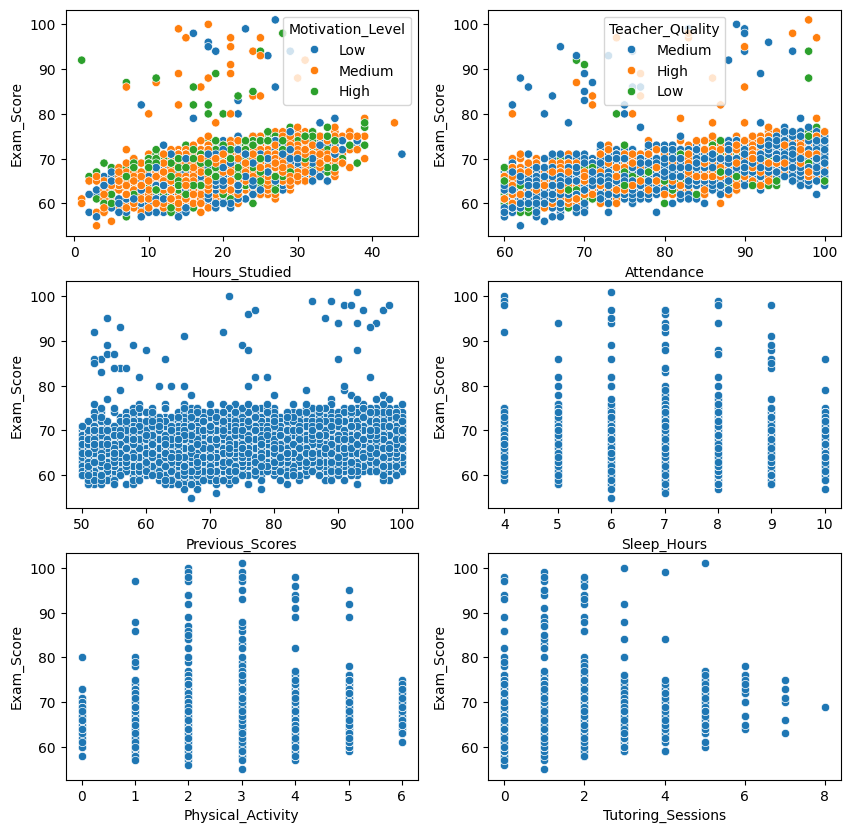

In [14]:
plt.figure(num=1,figsize=(10,10))
plt.subplot(3,2,1)
sns.scatterplot(data=d,x='Hours_Studied',y='Exam_Score',hue='Motivation_Level')
plt.subplot(3,2,2)
sns.scatterplot(data=d,x='Attendance',y='Exam_Score',hue='Teacher_Quality')
plt.subplot(3,2,3)
sns.scatterplot(data=d,x='Previous_Scores',y='Exam_Score')
plt.subplot(3,2,4)
sns.scatterplot(data=d,x='Sleep_Hours',y='Exam_Score')
plt.subplot(3,2,5)
sns.scatterplot(data=d,x='Physical_Activity',y='Exam_Score')
plt.subplot(3,2,6)
sns.scatterplot(data=d,x='Tutoring_Sessions',y='Exam_Score')
plt.show()

In [15]:
#The scatter plots and the correlation matrix indicate a considerable correlation between the exam score with the number of hours studied and attendance.
#Previous score seems to be irrelevant in predicting the student's upcoming exam score

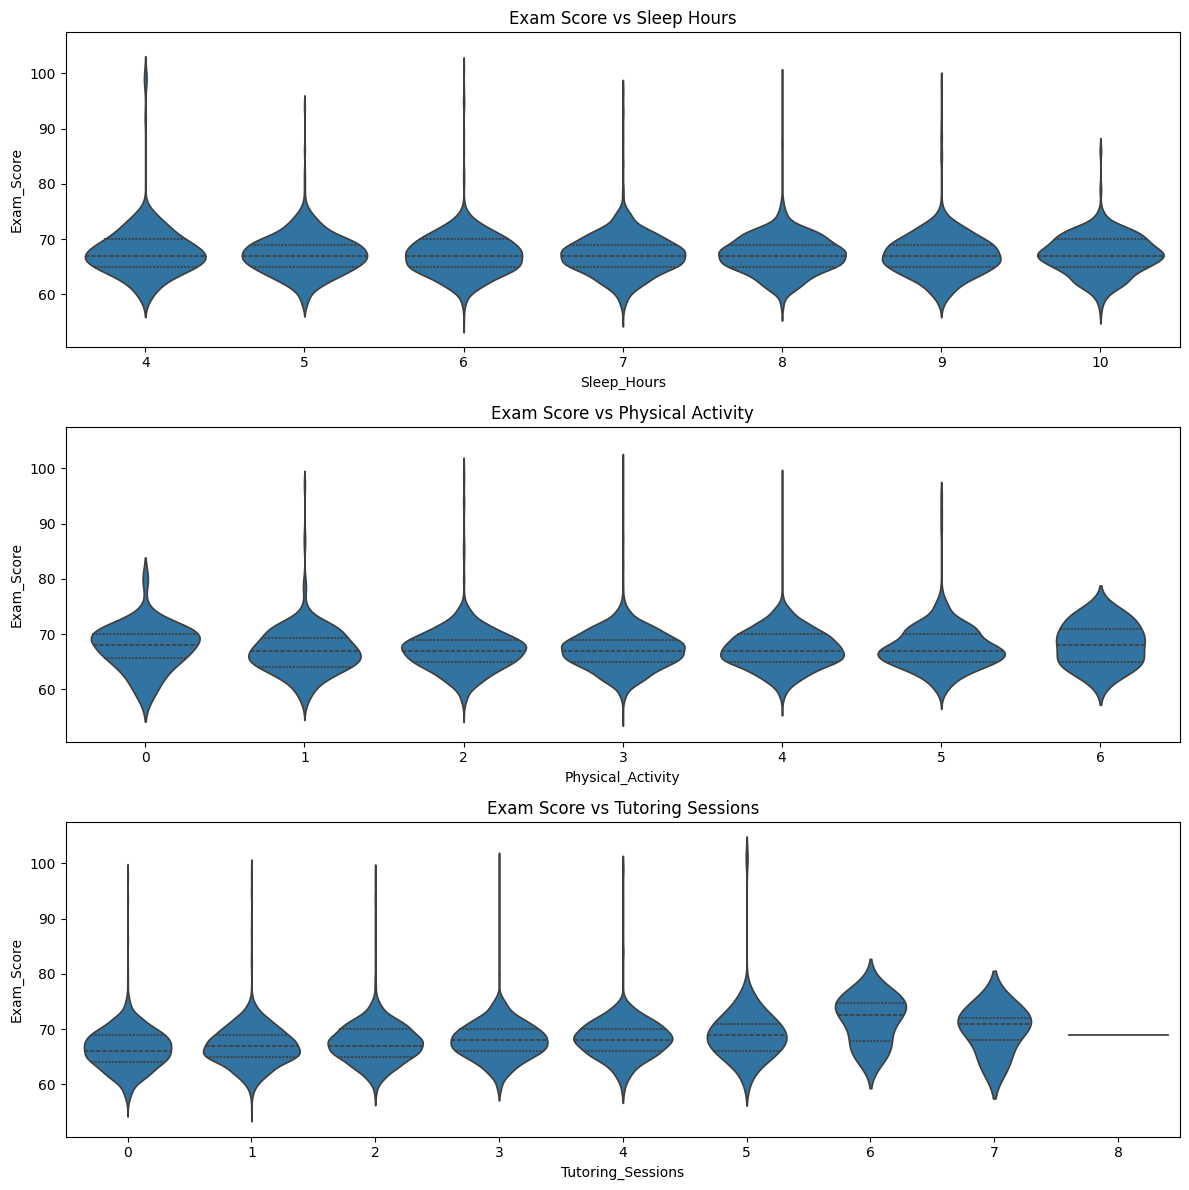

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sleep_order = sorted(d['Sleep_Hours'].unique())
activity_order = sorted(d['Physical_Activity'].unique())
tutor_order = sorted(d['Tutoring_Sessions'].unique())

fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharey=True)

sns.violinplot(ax=axes[0], x=d['Sleep_Hours'].astype(str), y=d['Exam_Score'], order=[str(x) for x in sleep_order], inner='quartile')
axes[0].set_title('Exam Score vs Sleep Hours')

sns.violinplot(ax=axes[1], x=d['Physical_Activity'].astype(str), y=d['Exam_Score'], order=[str(x) for x in activity_order],inner='quartile')
axes[1].set_title('Exam Score vs Physical Activity')

sns.violinplot(ax=axes[2], x=d['Tutoring_Sessions'].astype(str), y=d['Exam_Score'], order=[str(x) for x in tutor_order], inner='quartile')
axes[2].set_title('Exam Score vs Tutoring Sessions')

plt.tight_layout()
plt.show()



In [17]:
#While the number of sleep hours and physical activity and number of tutoting sessions seem to have no overall correlation with the exam score,
#we can notice that higher values of these features reduce the possibility of scoring higher scores.

In [18]:
for col in d.select_dtypes(include=['object']):
  print(d[col].value_counts())
  print()

Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64

Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64

Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64

Internet_Access
Yes    5893
No      485
Name: count, dtype: int64

Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64

Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64

School_Type
Public     4434
Private    1944
Name: count, dtype: int64

Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64

Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64

Parental_Education_Level
High School     3159
College         1939
Postgraduate    1280
Name: count, dtype: int64

Distance_from_Home
Near        3801
Moderate    1941
Fa

In [19]:
from sklearn.model_selection import train_test_split
X=d.drop(columns=['Exam_Score'])
y=d['Exam_Score']
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [21]:
#preprocessing pipeline
ordinal_columns = ['Parental_Involvement','Access_to_Resources','Motivation_Level',
                   'Family_Income','Teacher_Quality','Distance_from_Home','Parental_Education_Level','Peer_Influence','School_Type']

OneHot_columns = ['Extracurricular_Activities','Internet_Access','Learning_Disabilities','Gender']

num_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity']
categories=[['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High'],
    ['Far', 'Moderate', 'Near'],
    ['High School', 'College', 'Postgraduate'],
    ['Negative', 'Neutral', 'Positive'],
    ['Public', 'Private']]
prep_pipe=Pipeline(steps=(('ord_encoding',OrdinalEncoder(categories=categories)),('scaling_1',MinMaxScaler())))
preprocessing=ColumnTransformer([('OHencoder',OneHotEncoder(drop='first'),OneHot_columns),
                      ('encod_scaling',prep_pipe,ordinal_columns),('scaling_2',MinMaxScaler(),num_cols)],remainder='passthrough')


In [22]:
#Linear Regression

In [23]:
pipe_lr=Pipeline(steps=(('preprocessing',preprocessing),('LR',LinearRegression())))
pipe_lr.fit(X_train,y_train)
print(pipe_lr.named_steps['LR'].coef_)
print(pipe_lr.named_steps['LR'].intercept_)

pred_lr=pipe_lr.predict(X_test)
print('MSE:',mean_squared_error(y_test,pred_lr))
print('R2:',r2_score(y_test,pred_lr))

[ 5.60926333e-01  8.99670116e-01 -8.65982745e-01 -1.05561759e-02
  2.01353683e+00  2.04359213e+00  1.10252580e+00  1.13308713e+00
  1.10520298e+00  9.20531677e-01  9.90632102e-01  1.00214872e+00
 -4.99050015e-02  1.27107986e+01  7.95050804e+00 -7.96083330e-02
  2.43368828e+00  3.86860214e+00  1.19409454e+00]
48.66018814743599
MSE: 4.153009764099108
R2: 0.7327419455105677


In [24]:
#Lasso Regression

In [25]:

pipe_lasso = Pipeline(steps=[('preprocessing', preprocessing), ('lasso', Lasso(max_iter=10000))])
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 5, 10]}
lasso_model = GridSearchCV(estimator=pipe_lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
lasso_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Learning_Disabilities',
                                                                          'Gender']),
                                                                        ('encod_scaling',
                                                                         Pipeline(steps=(('ord_encoding',
                                                                                          OrdinalEncoder(categories=[['Low',
                                                                                                                      'Medium',
                                                                                                                      'High'],
                                                                                                                     ['Low',
                                                                                                                      'M...
                                                                          'Teacher_Quality',
                                                                          'Distance_from_Home',
                                                                          'Parental_Education_Level',
                                                                          'Peer_Influence',
                                                                          'School_Type']),
                                                                        ('scaling_2',
                                                                         MinMaxScaler(),
                                                                         ['Hours_Studied',
                                                                          'Attendance',
                                                                          'Sleep_Hours',
                                                                          'Previous_Scores',
                                                                          'Tutoring_Sessions',
                                                                          'Physical_Activity'])])),
                                       ('lasso', Lasso(max_iter=10000))]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [26]:
best_lasso=lasso_model.best_estimator_
print(lasso_model.best_params_)

pred_lasso=best_lasso.predict(X_test)
print('MSE:',mean_squared_error(y_test,pred_lasso))
print('R2:',r2_score(y_test,pred_lasso))

{'lasso__alpha': 0.01}
MSE: 4.16887263939247
R2: 0.7317211241231102


In [27]:
#Ridge Regression

In [28]:
pipe_ridge = Pipeline(steps=[('preprocessing', preprocessing), ('rdg', Ridge())])
param_grid = {'rdg__alpha': [0.01, 0.1, 1, 5, 10]}
ridge_model = GridSearchCV(estimator=pipe_ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Learning_Disabilities',
                                                                          'Gender']),
                                                                        ('encod_scaling',
                                                                         Pipeline(steps=(('ord_encoding',
                                                                                          OrdinalEncoder(categories=[['Low',
                                                                                                                      'Medium',
                                                                                                                      'High'],
                                                                                                                     ['Low',
                                                                                                                      'M...
                                                                          'Motivation_Level',
                                                                          'Family_Income',
                                                                          'Teacher_Quality',
                                                                          'Distance_from_Home',
                                                                          'Parental_Education_Level',
                                                                          'Peer_Influence',
                                                                          'School_Type']),
                                                                        ('scaling_2',
                                                                         MinMaxScaler(),
                                                                         ['Hours_Studied',
                                                                          'Attendance',
                                                                          'Sleep_Hours',
                                                                          'Previous_Scores',
                                                                          'Tutoring_Sessions',
                                                                          'Physical_Activity'])])),
                                       ('rdg', Ridge())]),
             param_grid={'rdg__alpha': [0.01, 0.1, 1, 5, 10]},
             scoring='neg_mean_squared_error')

In [29]:
best_ridge=ridge_model.best_estimator_
print(ridge_model.best_params_)

pred_rdg=best_ridge.predict(X_test)
print('MSE:',mean_squared_error(y_test,pred_rdg))
print('R2:',r2_score(y_test,pred_rdg))

{'rdg__alpha': 0.1}
MSE: 4.152985993082943
R2: 0.7327434752434349


In [30]:
#Decision Tree Regression

In [31]:
pipe_dt = Pipeline(steps=[('preprocessing', preprocessing), ('dt', DecisionTreeRegressor(random_state=42))])
param_grid_dt = {'dt__max_depth': [None, 5, 10, 20], 'dt__min_samples_split': [2, 10, 20], 'dt__min_samples_leaf': [1, 5, 10]}
dt_model = GridSearchCV(estimator=pipe_dt, param_grid=param_grid_dt, scoring='neg_mean_squared_error', cv=5)
dt_model.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHencoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Learning_Disabilities',
                                                                          'Gender']),
                                                                        ('encod_scaling',
                                                                         Pipeline(steps=(('ord_encoding',
                                                                                          OrdinalEncoder(categories=[['Low',
                                                                                                                      'Medium',
                                                                                                                      'High'],
                                                                                                                     ['Low',
                                                                                                                      'M...
                                                                          'Peer_Influence',
                                                                          'School_Type']),
                                                                        ('scaling_2',
                                                                         MinMaxScaler(),
                                                                         ['Hours_Studied',
                                                                          'Attendance',
                                                                          'Sleep_Hours',
                                                                          'Previous_Scores',
                                                                          'Tutoring_Sessions',
                                                                          'Physical_Activity'])])),
                                       ('dt',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'dt__max_depth': [None, 5, 10, 20],
                         'dt__min_samples_leaf': [1, 5, 10],
                         'dt__min_samples_split': [2, 10, 20]},
             scoring='neg_mean_squared_error')

In [32]:
best_dt=dt_model.best_estimator_
print(dt_model.best_params_)

pred_dt=best_dt.predict(X_test)
print('MSE:',mean_squared_error(y_test,pred_dt))
print('R2:',r2_score(y_test,pred_dt))

{'dt__max_depth': None, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 2}
MSE: 7.1195462166951415
R2: 0.5418368415191297


In [33]:
#Random Forest Regression

In [34]:
pipe_rf = Pipeline(steps=[('preprocessing', preprocessing), ('rf', RandomForestRegressor(random_state=42,))])
param_distributions = {'rf__max_depth':[20,30],'rf__min_samples_split':[10,50,200,500],'rf__min_samples_leaf': [50,200,500],'rf__max_leaf_nodes':[20]}

rf_model = RandomizedSearchCV(estimator=pipe_rf, param_distributions=param_distributions, scoring='neg_mean_squared_error', n_iter=10, cv=5)
rf_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHencoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Extracurricular_Activities',
                                                                                'Internet_Access',
                                                                                'Learning_Disabilities',
                                                                                'Gender']),
                                                                              ('encod_scaling',
                                                                               Pipeline(steps=(('ord_encoding',
                                                                                                OrdinalEncoder(categories=[['Low',
                                                                                                                            'Medium',
                                                                                                                            'High'],
                                                                                                                           ['L...
                                                                               MinMaxScaler(),
                                                                               ['Hours_Studied',
                                                                                'Attendance',
                                                                                'Sleep_Hours',
                                                                                'Previous_Scores',
                                                                                'Tutoring_Sessions',
                                                                                'Physical_Activity'])])),
                                             ('rf',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'rf__max_depth': [20, 30],
                                        'rf__max_leaf_nodes': [20],
                                        'rf__min_samples_leaf': [50, 200, 500],
                                        'rf__min_samples_split': [10, 50, 200,
                                                                  500]},
                   scoring='neg_mean_squared_error')

In [35]:
best_rf=rf_model.best_estimator_
print(rf_model.best_params_)

pred_rf=best_rf.predict(X_test)
print('MSE:',mean_squared_error(y_test,pred_rf))
print('R2:',r2_score(y_test,pred_rf))

{'rf__min_samples_split': 50, 'rf__min_samples_leaf': 50, 'rf__max_leaf_nodes': 20, 'rf__max_depth': 30}
MSE: 6.863933451640912
R2: 0.5582862539143536


In [36]:
#K nearest Neighbours Regression

In [37]:
def gaussian_weights(distances, sigma=1.0):
    return np.exp(-(distances ** 2) / (2 * sigma ** 2))

pipe_knn = Pipeline(steps=[('preprocessing', preprocessing), ('knn', KNeighborsRegressor())])

param_dist = {'knn__n_neighbors': [3, 5, 7, 9, 15], 'knn__metric': ['euclidean', 'manhattan'], 'knn__weights': ['uniform', 'distance', gaussian_weights]}

knn_model = RandomizedSearchCV(estimator=pipe_knn, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=15, random_state=42)

knn_model.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHencoder',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Extracurricular_Activities',
                                                                                'Internet_Access',
                                                                                'Learning_Disabilities',
                                                                                'Gender']),
                                                                              ('encod_scaling',
                                                                               Pipeline(steps=(('ord_encoding',
                                                                                                OrdinalEncoder(categories=[['Low',
                                                                                                                            'Medium',
                                                                                                                            'High'],
                                                                                                                           ['L...
                                                                                'Attendance',
                                                                                'Sleep_Hours',
                                                                                'Previous_Scores',
                                                                                'Tutoring_Sessions',
                                                                                'Physical_Activity'])])),
                                             ('knn', KNeighborsRegressor())]),
                   n_iter=15,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan'],
                                        'knn__n_neighbors': [3, 5, 7, 9, 15],
                                        'knn__weights': ['uniform', 'distance',
                                                         <function gaussian_weights at 0x00000204F77E8680>]},
                   random_state=42, scoring='neg_mean_squared_error')

In [38]:
best_knn = knn_model.best_estimator_
print(knn_model.best_params_)

pred_knn = best_knn.predict(X_test)

print("KNN MSE:", mean_squared_error(y_test, pred_knn))
print("KNN R2:", r2_score(y_test, pred_knn))



{'knn__weights': 'distance', 'knn__n_neighbors': 15, 'knn__metric': 'manhattan'}
KNN MSE: 9.052477300544732
KNN R2: 0.41744719875992164


In [41]:
#Multiple regression models were trained and evaluated using cross-validated hyperparameter tuning.
#Model performance was assessed using Mean Squared Error (MSE) and R² score on the test set.
#Linear models outperform non-linear models, suggesting that the relationship between student features (study hours, attendance, sleep hours, parental factors, etc.) and exam score is largely linear.
#Ridge and Lasso do not significantly improve performance over plain Linear Regression.
#Tree-based models (Decision Tree, Random Forest) underperformed, possibly due to lack of nonlinear trends.
#KNN performed the worst, which is expected in higher-dimensional feature spaces and datasets with mixed encoded categorical and numerical variables.